Frecuencia cardíaca estimada: 80.67 BPM


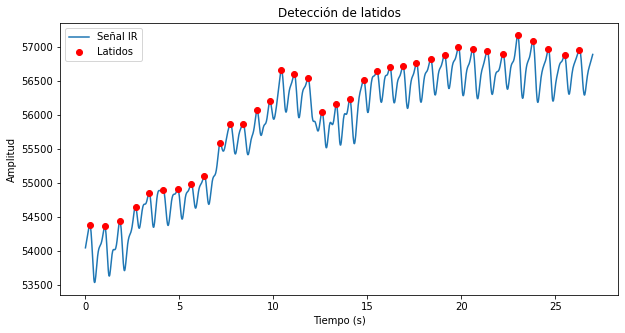

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks, butter, filtfilt

def cargar_datos(ruta_csv):
    """Carga los datos del CSV y devuelve el tiempo y la señal IR, eliminando los primeros 3 segundos."""
    df = pd.read_csv(ruta_csv, delimiter =";")
    tiempo = df.iloc[:, 0].values / 1000  # Convertir a segundos si está en ms
    señal_ir = df.iloc[:, 1].values
    
    # Eliminar los primeros 3 segundos
    indice_inicio = np.searchsorted(tiempo, 3)
    tiempo = tiempo[indice_inicio:] - tiempo[indice_inicio]  # Reajustar tiempo a partir de 0
    señal_ir = señal_ir[indice_inicio:]
    
    return tiempo, señal_ir

def filtrar_senal(señal, fs=60, cutoff=3, order=4):
    """Aplica un filtro pasa-bajos para reducir ruido."""
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    señal_filtrada = filtfilt(b, a, señal)
    return señal_filtrada

def detectar_picos(señal, tiempo, umbral=0.5, distancia=0.5):
    """Detecta picos en la señal filtrada que correspondan a latidos."""
    peaks, _ = find_peaks(señal, height=umbral, distance=distancia*(len(tiempo)/max(tiempo)))
    tiempos_picos = tiempo[peaks]
    return tiempos_picos

def calcular_frecuencia_cardiaca(tiempos_picos):
    """Calcula la frecuencia cardíaca a partir del tiempo entre picos."""
    if len(tiempos_picos) < 2:
        return None  # No hay suficientes latidos detectados
    diferencias = np.diff(tiempos_picos)
    frecuencia = 60 / np.mean(diferencias)
    return frecuencia

def visualizar_senal(tiempo, señal, tiempos_picos):
    """Grafica la señal con los picos detectados."""
    plt.figure(figsize=(10, 5))
    plt.plot(tiempo, señal, label="Señal IR")
    plt.plot(tiempos_picos, señal[np.searchsorted(tiempo, tiempos_picos)], 'ro', label="Latidos")
    plt.xlabel("Tiempo (s)")
    plt.ylabel("Amplitud")
    plt.legend()
    plt.title("Detección de latidos")
    plt.show()

# Uso del código
def main():
    ruta_csv = "C:/Users/Elena/Desktop/GitHub/TFG-Elena-Ruiz/Datos/Datos crudos/save_log2/raw_data_95_77_2.csv"  # Modifica según corresponda
    tiempo, señal_ir = cargar_datos(ruta_csv)
    señal_filtrada = filtrar_senal(señal_ir)
    tiempos_picos = detectar_picos(señal_filtrada, tiempo)
    frecuencia_cardiaca = calcular_frecuencia_cardiaca(tiempos_picos)
    
    if frecuencia_cardiaca:
        print(f"Frecuencia cardíaca estimada: {frecuencia_cardiaca:.2f} BPM")
    else:
        print("No se detectaron suficientes latidos.")
    
    visualizar_senal(tiempo, señal_filtrada, tiempos_picos)

if __name__ == "__main__":
    main()


Frecuencia cardíaca estimada: 76.78 BPM


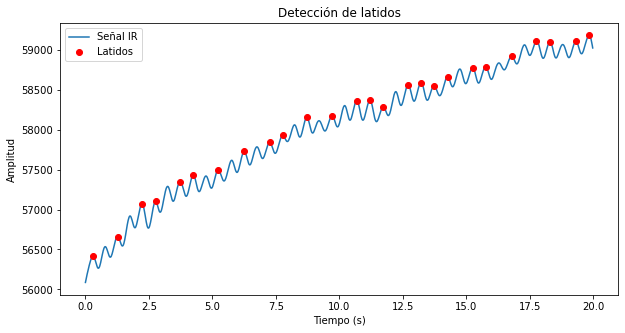

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks, butter, filtfilt

def cargar_datos(ruta_csv):
    """Carga los datos del CSV y devuelve el tiempo y la señal IR, eliminando los primeros 3 segundos."""
    df = pd.read_csv(ruta_csv, delimiter =";")
    tiempo = df.iloc[:, 0].values / 1000  # Convertir a segundos si está en ms
    señal_ir = df.iloc[:, 1].values
    
    # Eliminar los primeros 3 segundos
    indice_inicio = np.searchsorted(tiempo, 10)
    tiempo = tiempo[indice_inicio:] - tiempo[indice_inicio]  # Reajustar tiempo a partir de 0
    señal_ir = señal_ir[indice_inicio:]
    
    return tiempo, señal_ir

def filtrar_senal(señal, fs=60, cutoff=3, order=4):
    """Aplica un filtro pasa-bajos para reducir ruido."""
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    señal_filtrada = filtfilt(b, a, señal)
    return señal_filtrada

def detectar_picos(señal, tiempo, umbral=0.5, distancia=0.5):
    """Detecta picos en la señal filtrada que correspondan a latidos."""
    peaks, _ = find_peaks(señal, height=umbral, distance=distancia*(len(tiempo)/max(tiempo)))
    tiempos_picos = tiempo[peaks]
    return tiempos_picos

def calcular_frecuencia_cardiaca(tiempos_picos):
    """Calcula la frecuencia cardíaca a partir del tiempo entre picos."""
    if len(tiempos_picos) < 2:
        return None  # No hay suficientes latidos detectados
    diferencias = np.diff(tiempos_picos)
    frecuencia = 60 / np.mean(diferencias)
    return frecuencia

def visualizar_senal(tiempo, señal, tiempos_picos):
    """Grafica la señal con los picos detectados."""
    plt.figure(figsize=(10, 5))
    plt.plot(tiempo, señal, label="Señal IR")
    plt.plot(tiempos_picos, señal[np.searchsorted(tiempo, tiempos_picos)], 'ro', label="Latidos")
    plt.xlabel("Tiempo (s)")
    plt.ylabel("Amplitud")
    plt.legend()
    plt.title("Detección de latidos")
    plt.show()

# Uso del código
def main():
    ruta_csv = "C:/Users/Elena/Desktop/GitHub/TFG-Elena-Ruiz/Datos/Datos crudos/save_log2/raw_data_97_119.csv"  # Modifica según corresponda
    tiempo, señal_ir = cargar_datos(ruta_csv)
    señal_filtrada = filtrar_senal(señal_ir)
    tiempos_picos = detectar_picos(señal_filtrada, tiempo)
    frecuencia_cardiaca = calcular_frecuencia_cardiaca(tiempos_picos)
    
    if frecuencia_cardiaca:
        print(f"Frecuencia cardíaca estimada: {frecuencia_cardiaca:.2f} BPM")
    else:
        print("No se detectaron suficientes latidos.")
    
    visualizar_senal(tiempo, señal_filtrada, tiempos_picos)

if __name__ == "__main__":
    main()


Procesando: raw_data_91_91.csv
Frecuencia cardíaca estimada para raw_data_91_91.csv: 78.97 BPM


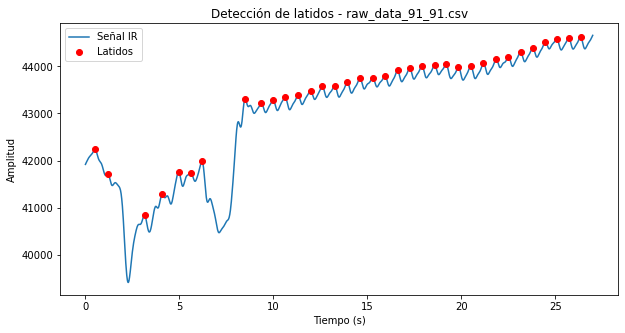

Procesando: raw_data_92_76.csv
Frecuencia cardíaca estimada para raw_data_92_76.csv: 84.52 BPM


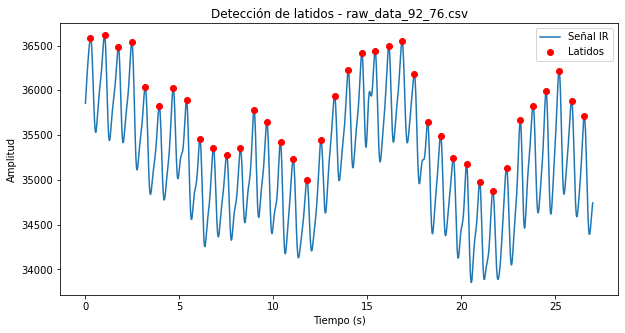

Procesando: raw_data_93_100.csv
Frecuencia cardíaca estimada para raw_data_93_100.csv: 64.16 BPM


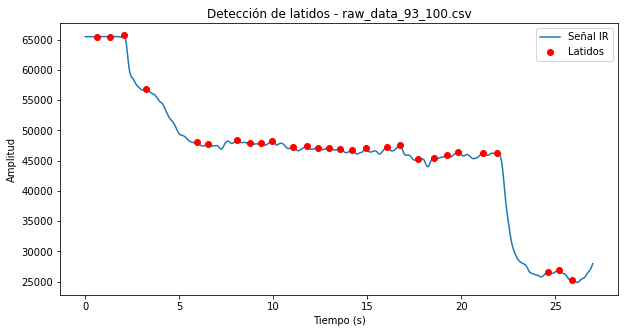

Procesando: raw_data_95_77_2.csv
Frecuencia cardíaca estimada para raw_data_95_77_2.csv: 80.67 BPM


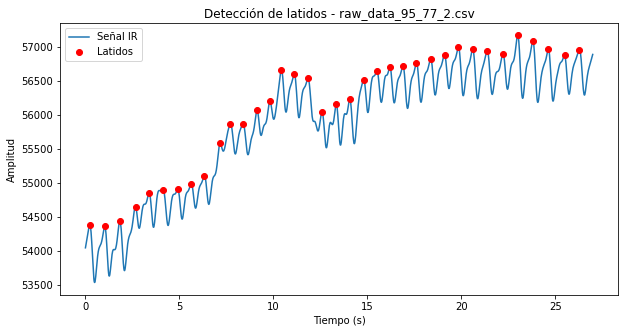

Procesando: raw_data_95_80.csv
Frecuencia cardíaca estimada para raw_data_95_80.csv: 77.32 BPM


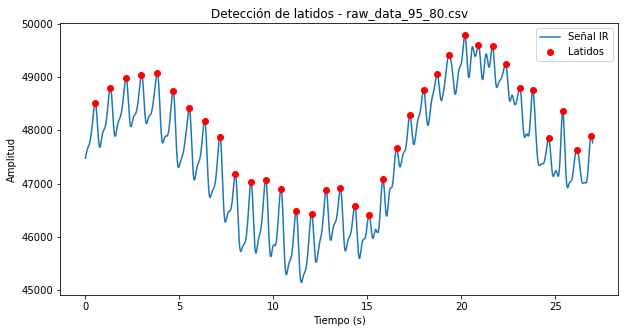

Procesando: raw_data_95_81_papa.csv
Frecuencia cardíaca estimada para raw_data_95_81_papa.csv: 80.72 BPM


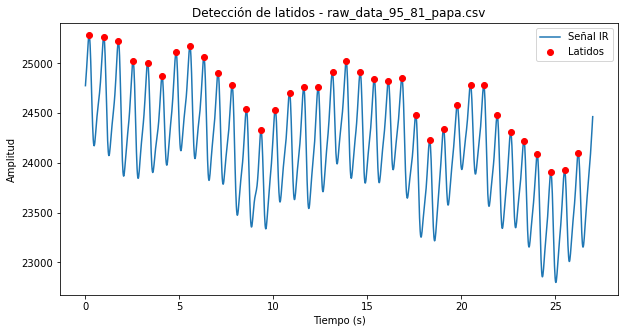

Procesando: raw_data_95_99.csv
Frecuencia cardíaca estimada para raw_data_95_99.csv: 95.16 BPM


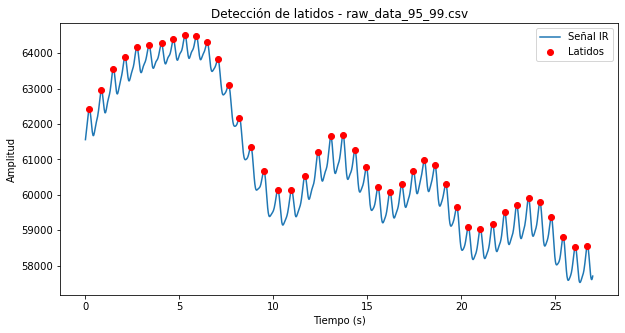

Procesando: raw_data_96_106.csv
Frecuencia cardíaca estimada para raw_data_96_106.csv: 67.70 BPM


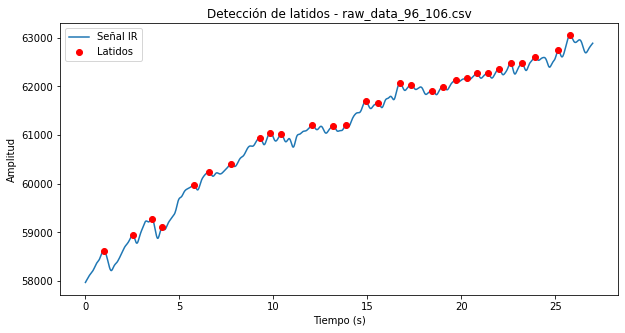

Procesando: raw_data_96_69.csv
Frecuencia cardíaca estimada para raw_data_96_69.csv: 70.95 BPM


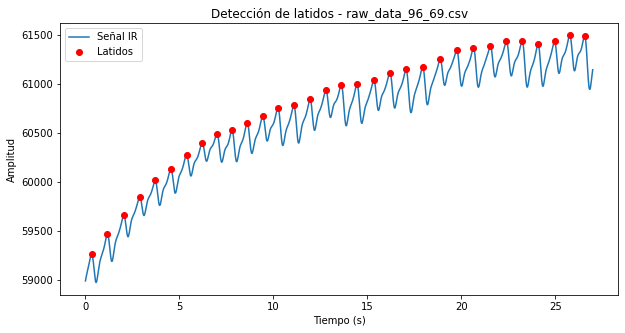

Procesando: raw_data_97_119.csv
Frecuencia cardíaca estimada para raw_data_97_119.csv: 72.96 BPM


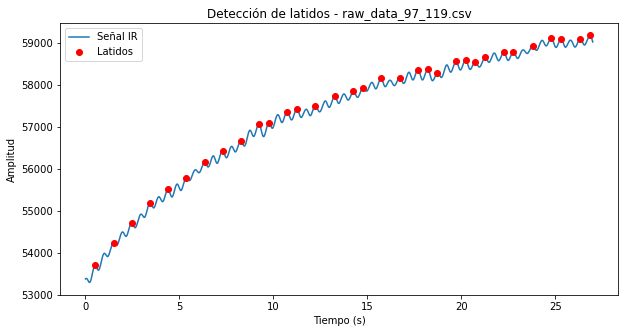

Procesando: raw_data_98_81.csv
Frecuencia cardíaca estimada para raw_data_98_81.csv: 79.20 BPM


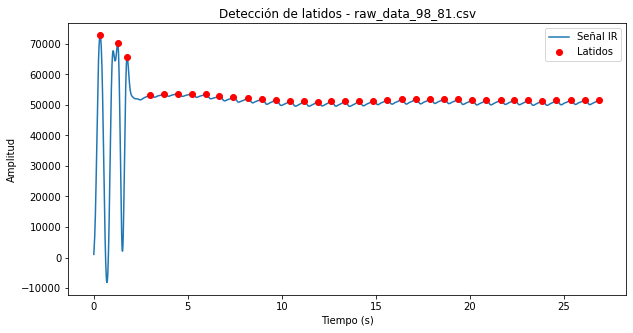

Procesando: raw_data_98_91.csv
Frecuencia cardíaca estimada para raw_data_98_91.csv: 100.13 BPM


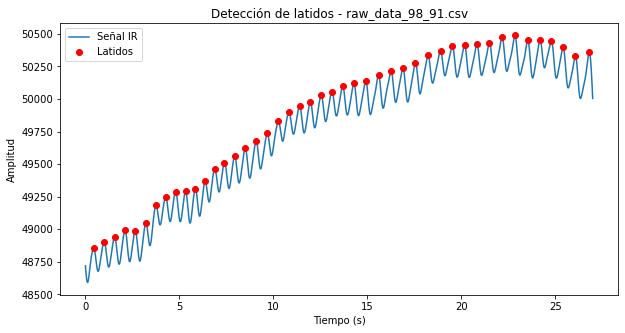

Procesando: raw_data_99_75.csv
Frecuencia cardíaca estimada para raw_data_99_75.csv: 74.77 BPM


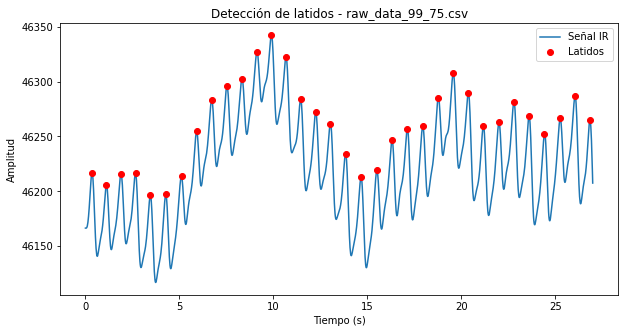

Procesando: raw_data_99_91.csv
Frecuencia cardíaca estimada para raw_data_99_91.csv: 76.74 BPM


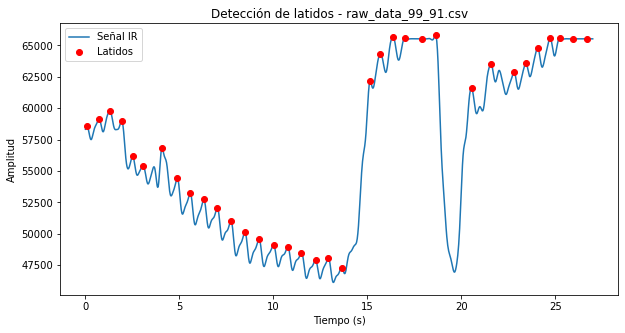

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from scipy.signal import find_peaks, butter, filtfilt

def cargar_datos(ruta_csv):
    """Carga los datos del CSV y devuelve el tiempo y la señal IR, eliminando los primeros 3 segundos."""
    df = pd.read_csv(ruta_csv, delimiter =";")
    tiempo = df.iloc[:, 0].values / 1000  # Convertir a segundos si está en ms
    señal_ir = df.iloc[:, 1].values
    
    # Eliminar los primeros 3 segundos
    indice_inicio = np.searchsorted(tiempo, 3)
    tiempo = tiempo[indice_inicio:] - tiempo[indice_inicio]  # Reajustar tiempo a partir de 0
    señal_ir = señal_ir[indice_inicio:]
    
    return tiempo, señal_ir

def filtrar_senal(señal, fs=60, cutoff=3, order=4):
    """Aplica un filtro pasa-bajos para reducir ruido."""
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    señal_filtrada = filtfilt(b, a, señal)
    return señal_filtrada

def detectar_picos(señal, tiempo, umbral=0.5, distancia=0.5):
    """Detecta picos en la señal filtrada que correspondan a latidos."""
    peaks, _ = find_peaks(señal, height=umbral, distance=distancia*(len(tiempo)/max(tiempo)))
    tiempos_picos = tiempo[peaks]
    return tiempos_picos

def calcular_frecuencia_cardiaca(tiempos_picos):
    """Calcula la frecuencia cardíaca a partir del tiempo entre picos."""
    if len(tiempos_picos) < 2:
        return None  # No hay suficientes latidos detectados
    diferencias = np.diff(tiempos_picos)
    frecuencia = 60 / np.mean(diferencias)
    return frecuencia

def visualizar_senal(tiempo, señal, tiempos_picos, titulo):
    """Grafica la señal con los picos detectados."""
    plt.figure(figsize=(10, 5))
    plt.plot(tiempo, señal, label="Señal IR")
    plt.plot(tiempos_picos, señal[np.searchsorted(tiempo, tiempos_picos)], 'ro', label="Latidos")
    plt.xlabel("Tiempo (s)")
    plt.ylabel("Amplitud")
    plt.legend()
    plt.title(titulo)
    plt.show()

def procesar_archivos(directorio):
    """Procesa todos los archivos CSV en la carpeta especificada."""
    for archivo in os.listdir(directorio):
        if archivo.endswith(".csv"):
            ruta_csv = os.path.join(directorio, archivo)
            print(f"Procesando: {archivo}")
            tiempo, señal_ir = cargar_datos(ruta_csv)
            señal_filtrada = filtrar_senal(señal_ir)
            tiempos_picos = detectar_picos(señal_filtrada, tiempo)
            frecuencia_cardiaca = calcular_frecuencia_cardiaca(tiempos_picos)
            
            if frecuencia_cardiaca:
                print(f"Frecuencia cardíaca estimada para {archivo}: {frecuencia_cardiaca:.2f} BPM")
            else:
                print(f"No se detectaron suficientes latidos en {archivo}.")
            
            visualizar_senal(tiempo, señal_filtrada, tiempos_picos, titulo=f"Detección de latidos - {archivo}")

def main():
    directorio = "C:/Users/Elena/Desktop/GitHub/TFG-Elena-Ruiz/Datos/Datos crudos/save_log2"  # Modifica según corresponda
    procesar_archivos(directorio)

if __name__ == "__main__":
    main()


Procesando: raw_data_91_91.csv
Frecuencia cardíaca estimada para raw_data_91_91.csv: 79.82 BPM


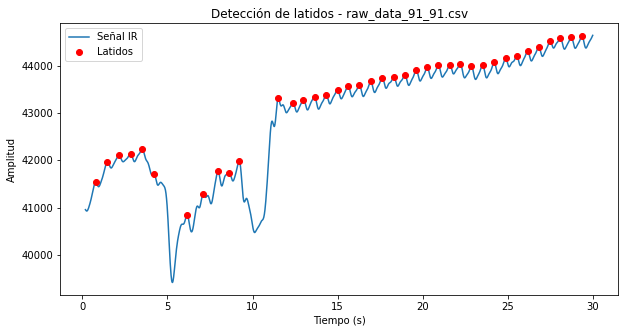

Procesando: raw_data_92_76.csv
Frecuencia cardíaca estimada para raw_data_92_76.csv: 84.30 BPM


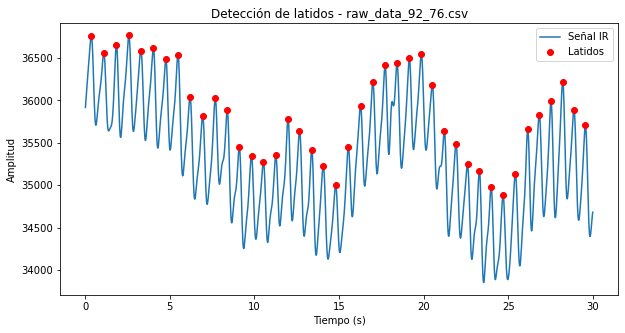

Procesando: raw_data_93_100.csv
Frecuencia cardíaca estimada para raw_data_93_100.csv: 71.60 BPM


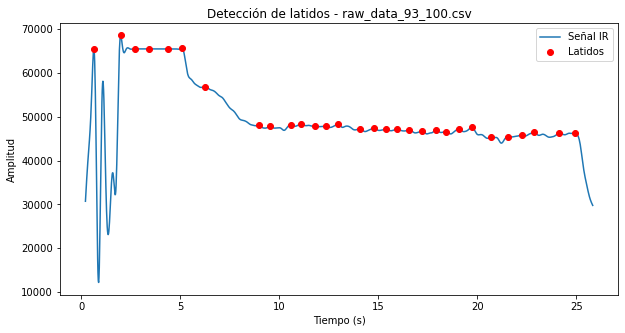

Procesando: raw_data_95_77_2.csv
Frecuencia cardíaca estimada para raw_data_95_77_2.csv: 80.74 BPM


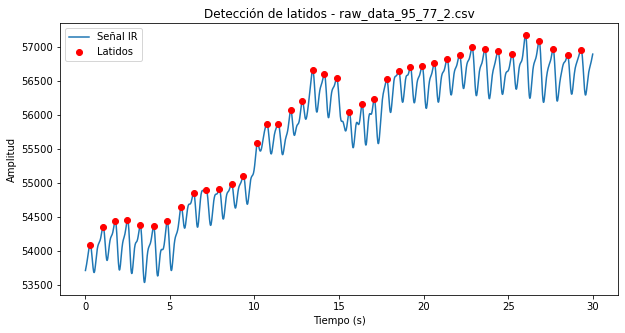

Procesando: raw_data_95_80.csv
Frecuencia cardíaca estimada para raw_data_95_80.csv: 77.43 BPM


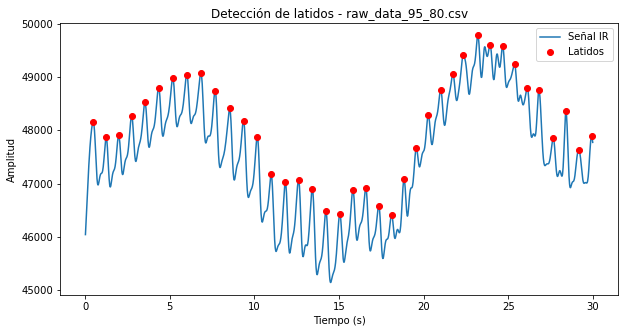

Procesando: raw_data_95_81_papa.csv
Frecuencia cardíaca estimada para raw_data_95_81_papa.csv: 80.14 BPM


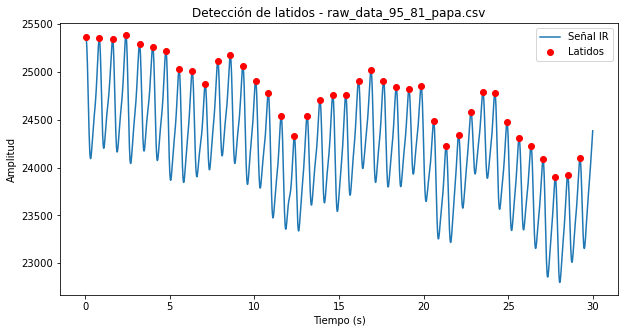

Procesando: raw_data_95_99.csv
Frecuencia cardíaca estimada para raw_data_95_99.csv: 95.18 BPM


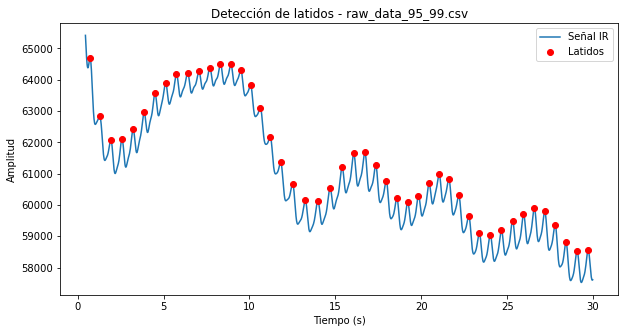

Procesando: raw_data_96_106.csv
Frecuencia cardíaca estimada para raw_data_96_106.csv: 73.47 BPM


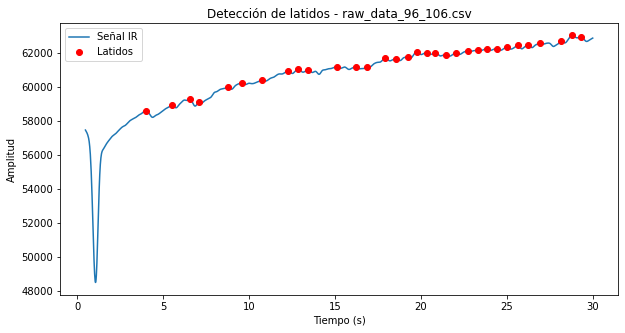

Procesando: raw_data_96_69.csv
Frecuencia cardíaca estimada para raw_data_96_69.csv: 71.52 BPM


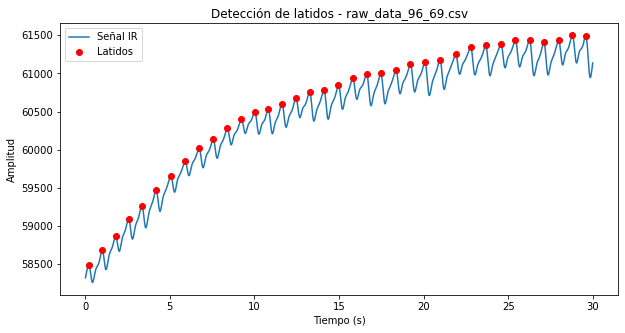

Procesando: raw_data_97_119.csv
Frecuencia cardíaca estimada para raw_data_97_119.csv: 120.84 BPM


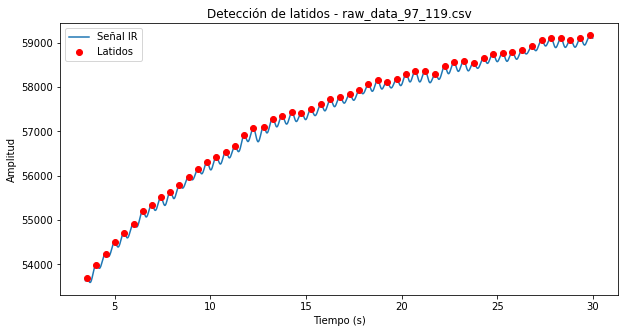

Procesando: raw_data_98_81.csv
Frecuencia cardíaca estimada para raw_data_98_81.csv: 79.29 BPM


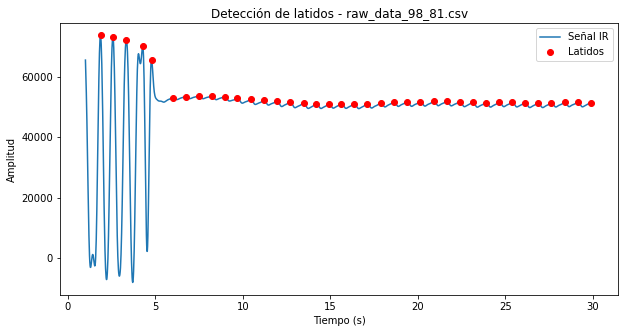

Procesando: raw_data_98_91.csv
Frecuencia cardíaca estimada para raw_data_98_91.csv: 99.05 BPM


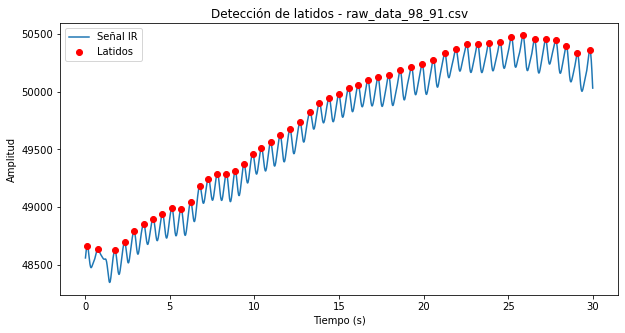

Procesando: raw_data_99_75.csv
Frecuencia cardíaca estimada para raw_data_99_75.csv: 75.43 BPM


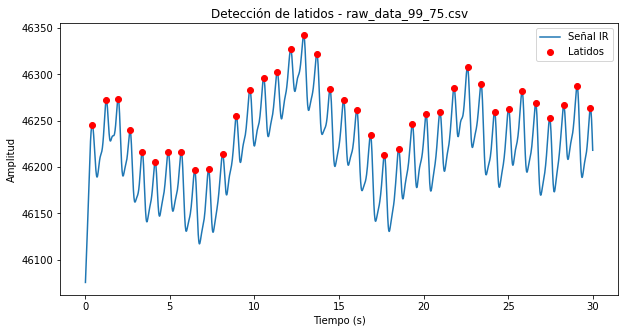

Procesando: raw_data_99_91.csv
Frecuencia cardíaca estimada para raw_data_99_91.csv: 77.73 BPM


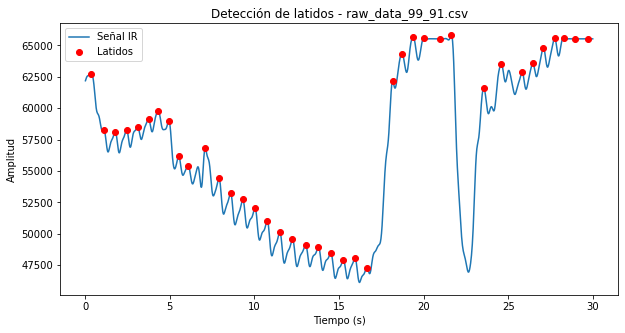

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from scipy.signal import find_peaks, butter, filtfilt

def cargar_datos(ruta_csv):
    """Carga los datos del CSV y devuelve el tiempo y la señal IR, eliminando los primeros 3 segundos."""
    df = pd.read_csv(ruta_csv, delimiter =";")
    tiempo = df.iloc[:, 0].values / 1000  # Convertir a segundos si está en ms
    señal_ir = df.iloc[:, 1].values
    
    return tiempo, señal_ir

def eliminar_extremos(tiempo, señal, umbral_factor=1.5):
    """Elimina valores extremos al inicio y final de la señal usando la mediana y un umbral dinámico."""
    mediana = np.median(señal)
    umbral = umbral_factor * np.std(señal)
    mascara = (señal > (mediana - umbral)) & (señal < (mediana + umbral))
    
    # Obtener el primer y último índice donde la señal es válida
    indices_validos = np.where(mascara)[0]
    if len(indices_validos) > 0:
        inicio_valido = indices_validos[0]
        fin_valido = indices_validos[-1]
        tiempo = tiempo[inicio_valido:fin_valido]
        señal = señal[inicio_valido:fin_valido]
    
    return tiempo, señal

def filtrar_senal(señal, fs=60, cutoff=3, order=4):
    """Aplica un filtro pasa-bajos para reducir ruido."""
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    señal_filtrada = filtfilt(b, a, señal)
    return señal_filtrada

def detectar_picos(señal, tiempo, umbral=0.5, distancia=0.5):
    """Detecta picos en la señal filtrada que correspondan a latidos."""
    peaks, _ = find_peaks(señal, height=umbral, distance=distancia*(len(tiempo)/max(tiempo)))
    tiempos_picos = tiempo[peaks]
    return tiempos_picos

def calcular_frecuencia_cardiaca(tiempos_picos):
    """Calcula la frecuencia cardíaca a partir del tiempo entre picos."""
    if len(tiempos_picos) < 2:
        return None  # No hay suficientes latidos detectados
    diferencias = np.diff(tiempos_picos)
    frecuencia = 60 / np.mean(diferencias)
    return frecuencia

def visualizar_senal(tiempo, señal, tiempos_picos, titulo):
    """Grafica la señal con los picos detectados."""
    plt.figure(figsize=(10, 5))
    plt.plot(tiempo, señal, label="Señal IR")
    plt.plot(tiempos_picos, señal[np.searchsorted(tiempo, tiempos_picos)], 'ro', label="Latidos")
    plt.xlabel("Tiempo (s)")
    plt.ylabel("Amplitud")
    plt.legend()
    plt.title(titulo)
    plt.show()

def procesar_archivos(directorio):
    """Procesa todos los archivos CSV en la carpeta especificada."""
    for archivo in os.listdir(directorio):
        if archivo.endswith(".csv"):
            ruta_csv = os.path.join(directorio, archivo)
            print(f"Procesando: {archivo}")
            tiempo, señal_ir = cargar_datos(ruta_csv)
            tiempo, señal_ir = eliminar_extremos(tiempo, señal_ir)
            señal_filtrada = filtrar_senal(señal_ir)
            tiempos_picos = detectar_picos(señal_filtrada, tiempo)
            frecuencia_cardiaca = calcular_frecuencia_cardiaca(tiempos_picos)
            
            if frecuencia_cardiaca:
                print(f"Frecuencia cardíaca estimada para {archivo}: {frecuencia_cardiaca:.2f} BPM")
            else:
                print(f"No se detectaron suficientes latidos en {archivo}.")
            
            visualizar_senal(tiempo, señal_filtrada, tiempos_picos, titulo=f"Detección de latidos - {archivo}")

def main():
    directorio = "C:/Users/Elena/Desktop/GitHub/TFG-Elena-Ruiz/Datos/Datos crudos/save_log2"  # Modifica según corresponda
    procesar_archivos(directorio)

if __name__ == "__main__":
    main()
